In [1]:
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Dropout,Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD
from keras.models import Sequential
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.applications import VGG16
from keras.applications import imagenet_utils

Using TensorFlow backend.


In [2]:
def loadDataH5():
    with h5py.File('data1.h5','r') as hf: 
        trainX = np.array(hf.get('trainX')) 
        trainY = np.array(hf.get('trainY')) 
        valX = np.array(hf.get('valX')) 
        valY = np.array(hf.get('valY')) 
        print (trainX.shape,trainY.shape) 
        print (valX.shape,valY.shape)
    return trainX, trainY, valX, valY 

In [3]:
trainX, trainY, valX, valY = loadDataH5()

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)


In [4]:
VGG_model = VGG16(weights="imagenet", include_top=False, input_shape=trainX.shape[1:])
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [5]:
features_train= VGG_model.predict(trainX)
features_train= features_train.reshape(features_train.shape[0], -1)
features_val= VGG_model.predict(valX)
features_val= features_val.reshape(features_val.shape[0], -1)

# RandomForest

In [6]:
model_RandomForest = RandomForestClassifier()
model_RandomForest.fit(features_train, trainY)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
results_RF = model_RandomForest.predict(features_val)
accuracy = accuracy_score(results_RF, valY)
print ("Accuracy (In percent): ", accuracy * 100)
correct = accuracy_score( results_RF,valY, normalize=False)
print("Imgaes found correctly: ",correct)
print("*"*50)
print("Confusion matrix :",confusion_matrix(valY, results_RF, labels=range(0,17)))

Accuracy (In percent):  77.64705882352942
Imgaes found correctly:  264
**************************************************
Confusion matrix : [[11  0  0  0  0  0  0  0  0  0  1  1  5  0  1  0  0]
 [ 0 13  0  0  0  0  0  0  0  1  1  0  0  0  0  1  0]
 [ 1  0 15  1  0  0  0  2  1  0  0  0  0  0  0  0  0]
 [ 4  1  0 11  0  1  0  0  0  0  1  0  1  0  0  1  0]
 [ 2  1  0  0 10  0  0  0  0  0  0  0  1  0  0  1  1]
 [ 0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  2  1]
 [ 0  0  0  0  1  0 17  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0 19  0  0  0  0  0  1  0  0  0]
 [ 0  1  0  0  1  0  0  0 24  0  0  0  1  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0 21  0  0  0  0  0  0  0]
 [ 3  1  0  0  0  1  0  0  0  0 18  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  0 17  0  0  0  0  4]
 [ 2  0  0  1  1  0  0  0  1  0  1  0 12  0  1  0  1]
 [ 0  1  0  0  0  0  0  2  0  0  0  0  0 20  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0 17  1  0]
 [ 2  0  0  2  0  1  0  0  0  0  0  1  2  0  0  7

# LogisticRegression

In [8]:
model= LogisticRegression()
model.fit(features_train, trainY)
model = model.predict(features_val)
accuracy = accuracy_score(model, valY)
print ("Accuracy (In percent): ", accuracy * 100)
correct = accuracy_score( model,valY, normalize=False)
print("Imgaes found correctly: ",correct)
print("*"*50)
print("Confusion matrix :",confusion_matrix(valY, model, labels=range(0,17)))

Accuracy (In percent):  87.94117647058823
Imgaes found correctly:  299
**************************************************
Confusion matrix : [[15  0  0  1  0  0  0  0  0  0  0  1  2  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 16  0  0  0  0  2  1  0  0  0  0  0  0  0  0]
 [ 1  1  0 14  1  1  0  0  1  0  0  0  0  0  0  1  0]
 [ 0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0 16  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  1  0 17  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0 25  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0 20  1  0  0  0  0  0  0]
 [ 1  0  0  0  1  0  0  0  0  0 21  0  0  0  0  0  0]
 [ 1  0  0  0  1  0  0  0  1  0  0 19  0  0  0  0  1]
 [ 1  0  0  1  1  0  0  0  0  0  1  0 15  0  1  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0]
 [ 3  0  0  1  0  0  0  0  0  0  0  0  2  0  0  9

C:\Users\StudyEasy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# LinearSVC

In [9]:


model= LinearSVC()
model.fit(features_train, trainY)
model = model.predict(features_val)
accuracy = accuracy_score(model, valY)
print ("Accuracy (In percent): ", accuracy * 100)
correct = accuracy_score( model,valY, normalize=False)
print("Imgaes found correctly: ",correct)
print("*"*50)
print("Confusion matrix :",confusion_matrix(valY, model, labels=range(0,17)))

Accuracy (In percent):  87.94117647058823
Imgaes found correctly:  299
**************************************************
Confusion matrix : [[15  0  0  1  0  0  0  0  0  0  0  1  2  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 16  0  0  0  0  2  1  0  0  0  0  0  0  0  0]
 [ 1  1  0 15  0  1  0  0  1  0  0  0  0  0  0  1  0]
 [ 0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0 16  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  1  0 17  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  0  0  0  0  0 25  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0 20  1  0  0  0  0  0  0]
 [ 1  0  0  0  1  0  0  0  0  0 21  0  0  0  0  0  0]
 [ 1  0  0  0  1  0  0  0  0  0  0 19  0  0  0  0  2]
 [ 2  0  0  0  1  0  0  0  0  0  0  0 16  0  1  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0 18  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  2  0  1  9

C:\Users\StudyEasy\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Sub-part 2: Explore the application of fine tuning as a method of transfer learning for the Flowers dataset.

In [10]:
def showGraph(Histroy, epochs):
    # plot the training loss and accuracy
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, epochs), Histroy.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), Histroy.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epochs), Histroy.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), Histroy.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.show()

## Step 1 & 2: # Freezing all the layers & added a new fully connected layer

In [11]:
vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=trainX.shape[1:])
vgg_model.summary()
vgg_model.trainable = False

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [12]:
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(17, activation='softmax'))

## Step 3: Train the weights on the new FC layer.

In [13]:
epochs = 30
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=SGD(lr=0.01),
              metrics=['accuracy'])
checkpoint = tf.keras.callbacks.ModelCheckpoint("FineTune01bestVGG.h5", monitor="val_loss", mode="min", save_best_only=True, verbose=1)
history = model.fit(x=trainX, y=trainY,
                            batch_size=32,
                            epochs=epochs,
                            callbacks=[checkpoint],
                            validation_data=(valX, valY))
showGraph(history, epochs)

## Step 4: Unfreeze the trainable weights on some of the convolutional layers in the base network.

In [14]:
vgg_model.trainable = True
set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv2']:
            set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [15]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [16]:
layers = []
for layer in vgg_model.layers:
    layers.append((layer, layer.name, layer.trainable))
print(pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']))
   

                                           Layer Type    Layer Name  \
0   <keras.engine.input_layer.InputLayer object at...       input_2   
1   <keras.layers.convolutional.Conv2D object at 0...  block1_conv1   
2   <keras.layers.convolutional.Conv2D object at 0...  block1_conv2   
3   <keras.layers.pooling.MaxPooling2D object at 0...   block1_pool   
4   <keras.layers.convolutional.Conv2D object at 0...  block2_conv1   
5   <keras.layers.convolutional.Conv2D object at 0...  block2_conv2   
6   <keras.layers.pooling.MaxPooling2D object at 0...   block2_pool   
7   <keras.layers.convolutional.Conv2D object at 0...  block3_conv1   
8   <keras.layers.convolutional.Conv2D object at 0...  block3_conv2   
9   <keras.layers.convolutional.Conv2D object at 0...  block3_conv3   
10  <keras.layers.pooling.MaxPooling2D object at 0...   block3_pool   
11  <keras.layers.convolutional.Conv2D object at 0...  block4_conv1   
12  <keras.layers.convolutional.Conv2D object at 0...  block4_conv2   
13  <k

In [17]:
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(17, activation='softmax'))


In [18]:
epochs = 50
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=SGD(lr=0.001),
              metrics=['accuracy'])

In [19]:
#trainX, trainY, valX, valY = loadDataH5()

## Step 5: Train the network again using a very small training rate. 

Train on 1020 samples, validate on 340 samples
Epoch 1/50
1020/1020 [==============================] - 69s 67ms/step - loss: 2.9672 - accuracy: 0.0686 - val_loss: 2.7256 - val_accuracy: 0.1382

Epoch 00001: val_loss improved from inf to 2.72555, saving model to postFineTunebestVGG.h5
Epoch 2/50
1020/1020 [==============================] - 68s 67ms/step - loss: 2.7698 - accuracy: 0.1216 - val_loss: 2.5786 - val_accuracy: 0.2765

Epoch 00002: val_loss improved from 2.72555 to 2.57865, saving model to postFineTunebestVGG.h5
Epoch 3/50
1020/1020 [==============================] - 70s 68ms/step - loss: 2.6143 - accuracy: 0.1735 - val_loss: 2.4303 - val_accuracy: 0.3765

Epoch 00003: val_loss improved from 2.57865 to 2.43031, saving model to postFineTunebestVGG.h5
Epoch 4/50
1020/1020 [==============================] - 68s 66ms/step - loss: 2.4777 - accuracy: 0.2049 - val_loss: 2.2781 - val_accuracy: 0.4765

Epoch 00004: val_loss improved from 2.43031 to 2.27811, saving model to postFineTune

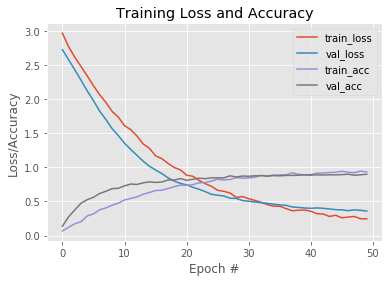

In [20]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("postFineTunebestVGG.h5", monitor="val_loss", mode="min", save_best_only=True, verbose=1)
history = model.fit(x=trainX, y=trainY,
                            batch_size=32,
                            epochs=epochs,
                            callbacks=[checkpoint],
                            validation_data=(valX, valY))
showGraph(history, epochs)

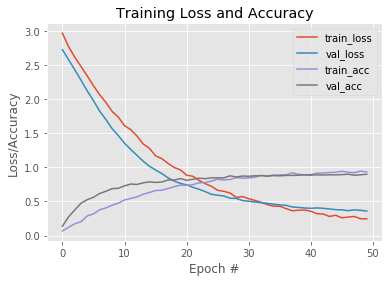

In [21]:
showGraph(history, epochs)